# 1. Introduction

`Nama :` Rhesa Akbar Elvarettano

`Batch :` SBY-003

`Objective:` Dalam project ini untuk membuat model Classification dengan memprediksi perilaku customers untuk mengetahui apakah pelanggan melakukan churn atau tidak dengan menggunakan dataset Telco Customer Churn.

`Tujuan Bisnis:` Perusahaan mengkhawatirkan tingkat perpindahan pelanggan yang tinggi. Tingkat churn adalah jumlah pelanggan yang keluar dari siklus pembelian. Ini bisa berupa tidak diperpanjangnya program loyalitas, atau pelanggan yang tidak puas mencari layanan yang lebih baik. Salah satu hal penting untuk menjalankan bisnis adalah pelanggan yang loyal, yang berarti meminimalkan tingkat churn.

`Penjelasan Dataset:` Dataset "Telco Customer Churn" ini berfokus pada informasi pelanggan di sebuah perusahaan telekomunikasi dan mencoba untuk memprediksi perilaku churn pelanggan, yaitu apakah pelanggan akan tetap berlangganan atau akan berhenti berlangganan layanan.

`Dataset Kaggle:` https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

# 2. Import Libraries

In [1]:
# import library
import pandas as pd
import numpy as np
from scipy import stats

#Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Sklearn
import sklearn
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import kendalltau
import time
import pickle
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore') #turn off warning

# 3. Data Loading

In [3]:
# load data asli
df_ori = pd.read_csv('p1m2_Telco-Customer-Churn.csv')

In [4]:
# Untuk berjaga jaga agar ada data asli
df = df_ori.copy()

In [5]:
# Menampilkan dataframe semua kolom
pd.set_option('display.max_columns', None)

# Menampilkan dataset Telco-Customer-Churn
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
# Menampilkan 5 data teratas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Menampilkan 5 data terbawah
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
# Menampilkan informasi tentang tipe data dan info lainnya.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Berdasarkan informasi diatas menampilkan tipe data, namun kolom TotalCharges tipe data belum sesuai sehingga nanti perlu diubah & informasi diatas tidak terlihat adanya missing value.

In [9]:
# Mengubah kolom total charge menjadi numerik
df["TotalCharges"] = df["TotalCharges"].apply(pd.to_numeric, errors="coerce")

Dalam kode di atas, parameter errors='coerce' digunakan untuk mengatasi jika ada nilai yang tidak dapat diubah menjadi float, misalnya jika ada nilai yang hilang atau tidak valid. Nilai-nilai tersebut akan diubah menjadi NaN (Not a Number).

In [10]:
# Ubah tipe data TotalCharges menjadi float
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [11]:
# Mengubah isi kolom Target/Churn 'Yes' menjadi 1 dan 'No' menjadi 0, supaya lebih mudah untuk cek korelasi dengan fitur lainnya
df['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [12]:
# Mengubah kolom Churn menjadi tipe data integer (int)
df['Churn'] = df['Churn'].astype(int)

In [13]:
# Menampilkan informasi tentang tipe data dan info lainnya.
# Mengecek kembali tipe data pada kolom TotalCharges & chrun setelah diubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Pada kolom TotalCharges & Churn tipe data telah diubah menjadi numerical float & int, namun terdapat mising value pada feature TotalCharge. dikarenakan jumlah mising valuenya kurang dari 1%, maka pada kasus ini semua mising valuenya di drop.

In [14]:
# Hapus missing value pada kolom TotalCharges
df.dropna(inplace=True)

In [15]:
# Cek missing value pada kolom TotalCharges
df['TotalCharges'].isnull().sum()

0

Setelah dihapus missing valuenya dicek kembali missing value pada kolom TotalCharges dan hasil missing value bernilai 0 artinya sudah tidak ada missing value

In [16]:
# check duplicated data
df.duplicated().sum()

0

Berdasarkan informasi tersebut didapat bahwa dataset tersebut telah bebas dari data - data yang bersifat duplicate.

In [17]:
# check nilai unique pada setiap kolom dalam dataframe 
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

Dari informasi diatas untuk menghitung jumlah nilai unik (cardinality) dalam setiap kolom dari DataFrame, nilai unik paling banyak pada kolom `customerID, TotalCharges & MonthlyCharges.`

In [18]:
# Cek rangkuman statistik deskriptif
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


**Beberapa informasi yang bisa diambil dari statistik deskriptif diatas**:

- Feature SeniorCitizen atau warga senior rata-rata 16.24%

- Feature tenure atau jumlah bulan pelanggan telah berlangganan minimum pada 1 bulan, maximum pada 72 bulan & rata-rata 32 bulan.

- Feature MonthlyCharges atau biaya bulanan minimum $18.250, maximum $118.750 & rata-rata $64.798.

- Feature TotalCharges atau Total biaya yang dibebankan kepada pelanggan minimum adalah $18.800, maksimum adalah $8684.800 & rata-rata $2283.300

- dst

# 4. Exploratory Data Analysis (EDA)

## 4.1 - EDA Target

In [21]:
# Cek dalam kolom target ada apa saja
df['Churn'].unique()

array([0, 1])

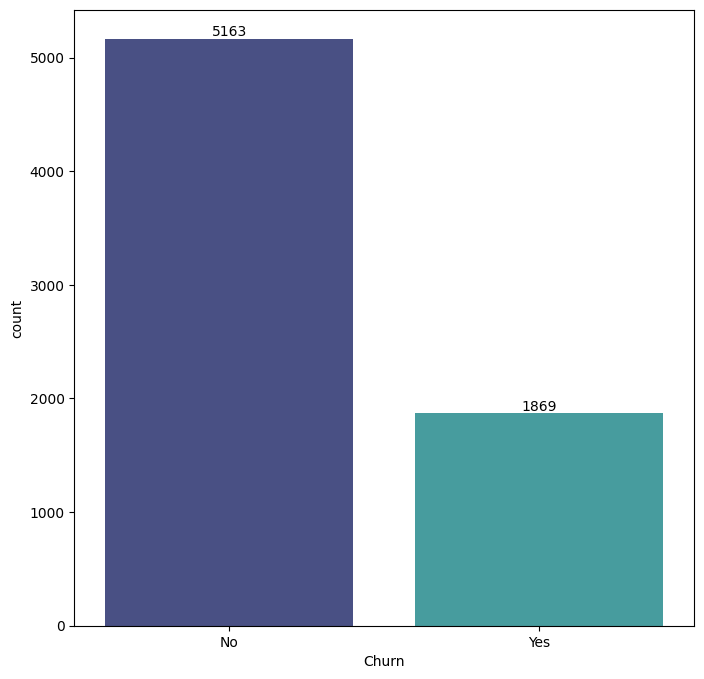

In [21]:
# Menampilkan kolom target No Churn & Churn
plt.figure(figsize=(8,8))
ax = sns.countplot(data=df, x='Churn', palette='mako')
plt.bar_label(plt.gca().containers[0])
plt.bar_label(plt.gca().containers[1])
plt.xticks([0,1], ['No', 'Yes']);

Dari informasi visualisasi kolom target diatas, diketahui ketidakseimbangan pada kolom target (Churn) cukup signifikan. Dengan  `No` sebanyak 5163 dan `Yes` sebesar mendekati 2000 

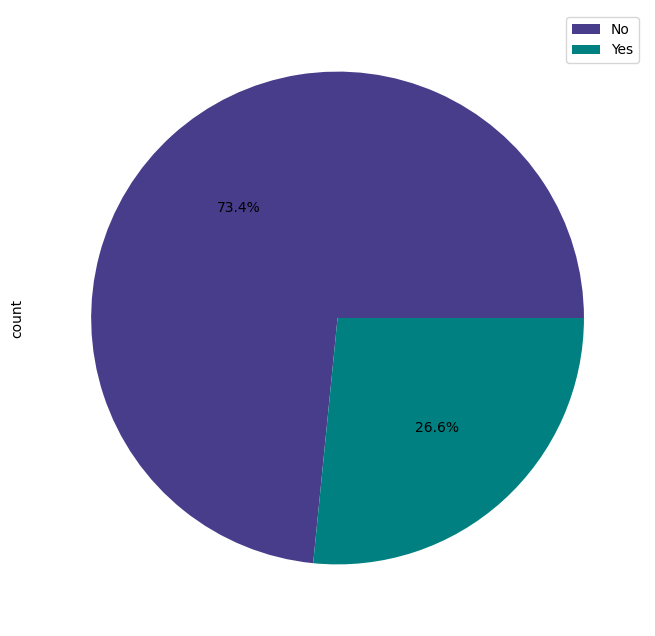

In [22]:
# Menampilkan visualisasi pie chart untuk presentase kolom target No Churn & Churn
plt.figure(figsize=(8,8), facecolor='white')
df['Churn'].value_counts().plot(kind='pie', labels = ['',''], autopct='%1.1f%%', colors = ['darkslateblue','teal'])
plt.legend(labels=['No', 'Yes']);

Dari informasi visualisasi kolom target diatas, diketahui ketidakseimbangan pada kolom target (Churn) cukup signifikan. Dengan  `No` sebesar 73% dan `Yes` sebesar 27%, sehingga perlu diseimbangkan nantinya.

## 4.2 - EDA Numerical

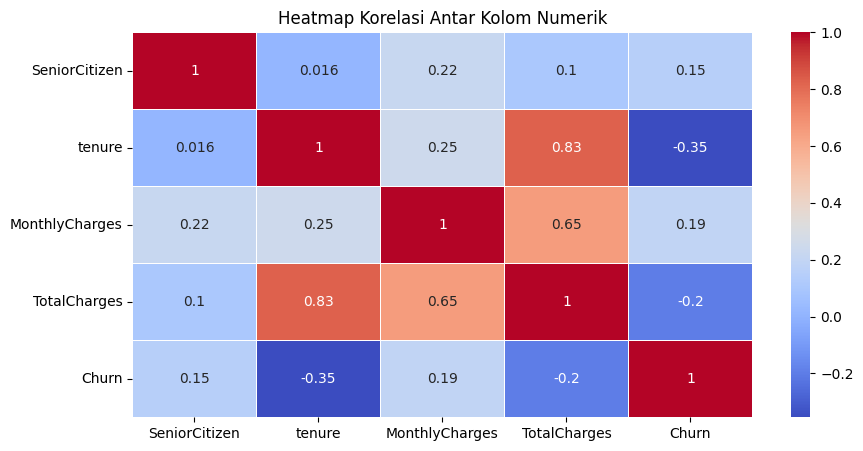

In [23]:
# Pilih kolom-kolom numerik
numeric_columns = df.select_dtypes(include=['float', 'int'])
# Menghitung matriks korelasi untuk antar kolom
correlation_matrix = numeric_columns.corr()
# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi Antar Kolom Numerik')
plt.show()

Pada heatmap ini bertujuan untuk melihat korelasi semua kolom target (Churn) dengan kolom numerik lainnya, untuk ambang batas korelasi antar kolom untuk model ini adalah `10%` atau `0,1` sehingga diperoleh kesimpulan:

- Semua kolom memiliki korelasi positif dan negatif dengan kolom target

- Semua kolom numerik ini bisa digunakan untuk langkah selanjutnya krn korelasinya dengan kolom target tidak ada yang kurang dari  `10%` atau `0,1`

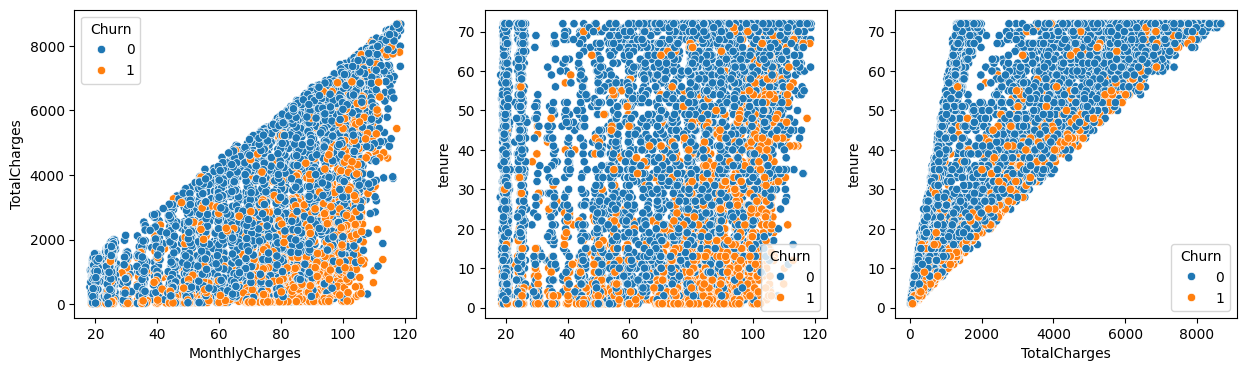

In [24]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='MonthlyCharges', y='tenure', hue='Churn')

plt.subplot(1,3,3)
sns.scatterplot(data=df, x='TotalCharges', y='tenure', hue='Churn')

plt.show()

Dari visualisasi diatas diperoleh informasi bahwa:

- Scaterplot pertama:
    - Tidak terlihat adanya pola tertentu yang menunjukkan hubungan antara biaya bulanan (MonthlyCharges) dan total biaya (TotalCharges).
    - Rentang nilai biaya bulanan dan total biaya cukup luas, menunjukkan variasi yang signifikan di antara pelanggan.
    - Tidak terlihat perbedaan pola yang signifikan antara pelanggan yang churn dan yang tidak churn.
    - Distribusi warna (hue) yang merata di seluruh plot menunjukkan bahwa perilaku churn tidak berkorelasi secara langsung dengan hubungan antara biaya bulanan dan total biaya.

- Scaterplot kedua:
    - Tidak terlihat adanya pola tertentu yang menunjukkan hubungan yang kuat antara biaya bulanan (MonthlyCharges) dan lama berlangganan (tenure).
    - Rentang nilai biaya bulanan cukup luas, dengan pelanggan membayar biaya bulanan dari rendah hingga tinggi.
    - Rentang nilai lama berlangganan bervariasi, dengan beberapa pelanggan baru dan beberapa pelanggan yang telah berlangganan untuk periode yang lebih lama.
    - Tidak terlihat perbedaan pola yang mencolok antara pelanggan yang churn dan yang tidak churn.

- Scaterplot ketiga:
    - Titik data tersebar di seluruh plot dengan variasi yang signifikan.
    - Terdapat kecenderungan bahwa pelanggan dengan lama berlangganan (tenure) yang lebih lama cenderung memiliki total biaya (TotalCharges) yang lebih tinggi.
    - Rentang nilai total biaya & lama berlangganan bervariasi
    - Distribusi warna (hue) yang merata menunjukkan bahwa perilaku churn tidak berkorelasi secara langsung dengan hubungan antara total biaya dan lama berlangganan.

- Berdasarkan visualisasi scaterplot, feature monthly charge, total charge, dan tenure tidak memperlihatkan suatu pola data terhadap target. hal ini mengartikan bahwa feature - feature tersebut tidak memiliki hubungan atau korelasi dengan feature target. total pembayaran dan tagihan bulanan customer tidak dapat memengaruhi seseorang dikelompokkan kedalam customer churn atau tidak

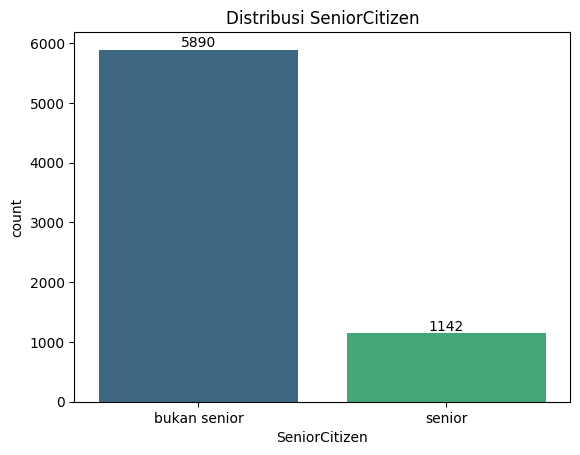

In [35]:
# Visualisasi distribusi SeniorCitizen
sns.countplot(data=df, x='SeniorCitizen', palette='viridis')
plt.title('Distribusi SeniorCitizen')
plt.bar_label(plt.gca().containers[0])
plt.bar_label(plt.gca().containers[1])
plt.xticks([1,0], ['senior', 'bukan senior']);
plt.show()

Visualisasi menggunakan countplot menunjukkan distribusi jumlah pelanggan senior dan non-senior, dimana lebih banyak non-senior dari pada senior yaitu non-senior sebanyak 5890 dan senior sebanyak 1000. 

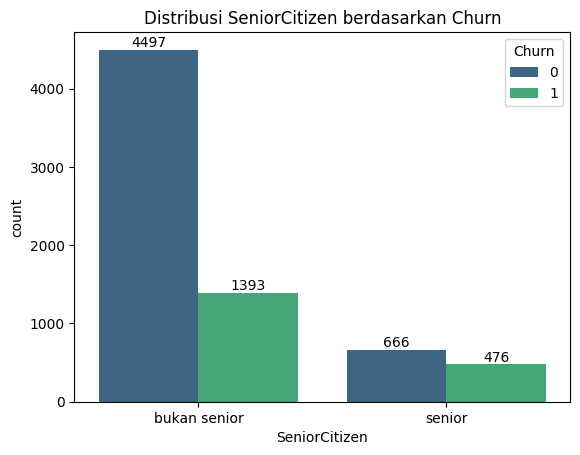

In [36]:
# Membandingkan SeniorCitizen dengan variabel target 'Churn'
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='viridis')
plt.title('Distribusi SeniorCitizen berdasarkan Churn')
plt.bar_label(plt.gca().containers[0])
plt.bar_label(plt.gca().containers[1])
plt.xticks([1,0], ['senior', 'bukan senior']);
plt.show()

Dari visualisasi countplot diatas, melihat perbandingan SeniorCitizen dengan variabel target Churn, dimana yg senior sedikit melakukan chrun dari pada yg tidak churn, pelanggan senior mungkin telah terbiasa dengan tata cara penggunaan layanan tersebut dan merasa sulit untuk beralih ke layanan yang berbeda. Mereka mungkin tidak ingin menghadapi kerumitan dalam mempelajari layanan baru.

## 4.3 - EDA Categorical

In [31]:
# Pilih kolom-kolom numerik
numerical_target = 'Churn'
categorical_columns = df.select_dtypes(include=['object'])
# Looping untuk menghitung korelasi Kendall's tau untuk setiap fitur kategorikal
for feature in categorical_columns:
    corr_tau, pval_k = kendalltau(df[numerical_target], df[feature])
    print(f"tau-correlation between {numerical_target} and {feature}: {corr_tau:.4f}, p-value: {pval_k}")

tau-correlation between Churn and customerID: -0.0146, p-value: 0.13427721881053986
tau-correlation between Churn and gender: -0.0085, p-value: 0.4736966308961934
tau-correlation between Churn and Partner: -0.1500, p-value: 2.8563814336192756e-36
tau-correlation between Churn and Dependents: -0.1631, p-value: 1.3649351471097033e-42
tau-correlation between Churn and PhoneService: 0.0117, p-value: 0.32692020639055885
tau-correlation between Churn and MultipleLines: 0.0365, p-value: 0.0015146455604171407
tau-correlation between Churn and InternetService: -0.0270, p-value: 0.016966208156134657
tau-correlation between Churn and OnlineSecurity: -0.2883, p-value: 5.047367249196186e-143
tau-correlation between Churn and OnlineBackup: -0.1924, p-value: 5.8078727510302345e-65
tau-correlation between Churn and DeviceProtection: -0.1761, p-value: 1.0345618678131337e-54
tau-correlation between Churn and TechSupport: -0.2815, p-value: 1.6661433456146354e-136
tau-correlation between Churn and Streami

Dari pengecekan korelasi antara kolom categorical dg kolom target (Churn) menggunakan kendalltau, yg nilai korelasinya besar yaitu kolom: `Partner, Dependents, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, PaymentMethod.`

In [32]:
categorical_columns

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


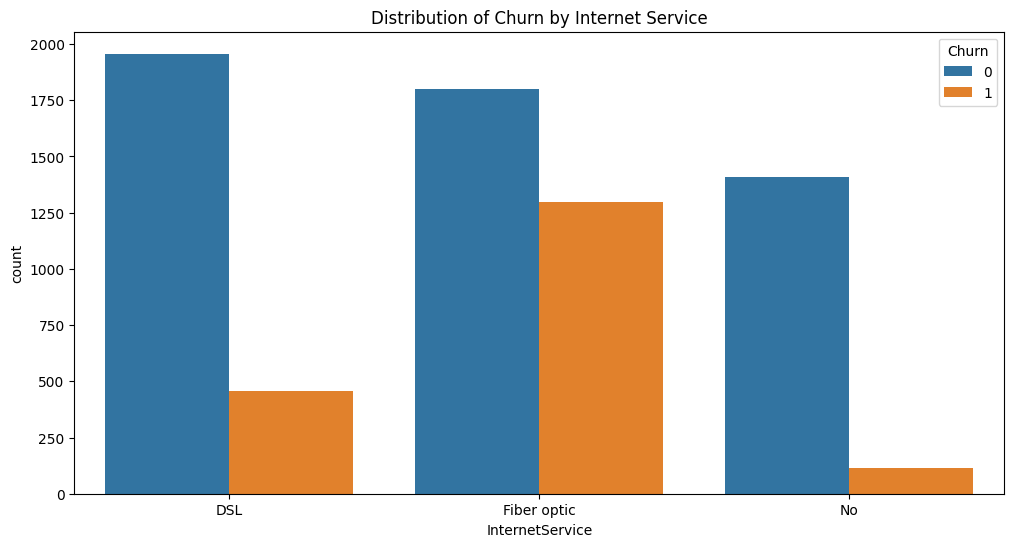

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Distribution of Churn by Internet Service')
plt.show()

Dari informasi visualisasi diatas bahwa distribusi data yang Churn paling banyak yiatu dengan layanan internet Fiber Optic. Perusahaan dapat mengevaluasi kualitas layanan Fiber Optic atau mempertimbangkan untuk meningkatkan promosi atau penawaran khusus untuk mempertahankan pelanggan.

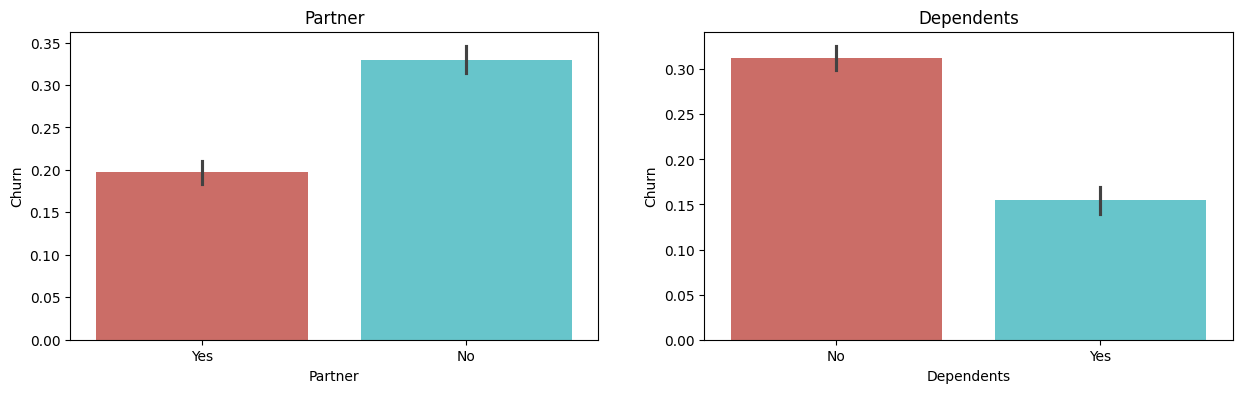

In [34]:
plt.figure(figsize=(15, 4))

# Menvisualisasikan Partner dengan kolom target
plt.subplot(1, 2, 1)
sns.barplot(data=df, x = 'Partner', y='Churn', palette='hls')
plt.title('Partner')

# Menvisualisasikan Dependents dengan kolom target
plt.subplot(1, 2, 2)
sns.barplot(data=df, x = 'Dependents', y='Churn', palette='hls')
plt.title('Dependents')

plt.show()

Pelanggan yang tidak memiliki pasangan dan tanggungan mungkin memiliki prioritas dan preferensi yang berbeda dalam penggunaan layanan. Jika layanan tersebut tidak memenuhi kebutuhan dan preferensi mereka dengan baik, mereka cenderung untuk mencari alternatif yang lebih sesuai, sedangkan pelanggan yang memiliki pasangan dan tanggungan mungkin memiliki stabilitas finansial yang lebih tinggi, yang membuat mereka lebih mampu untuk membayar biaya langganan secara teratur.

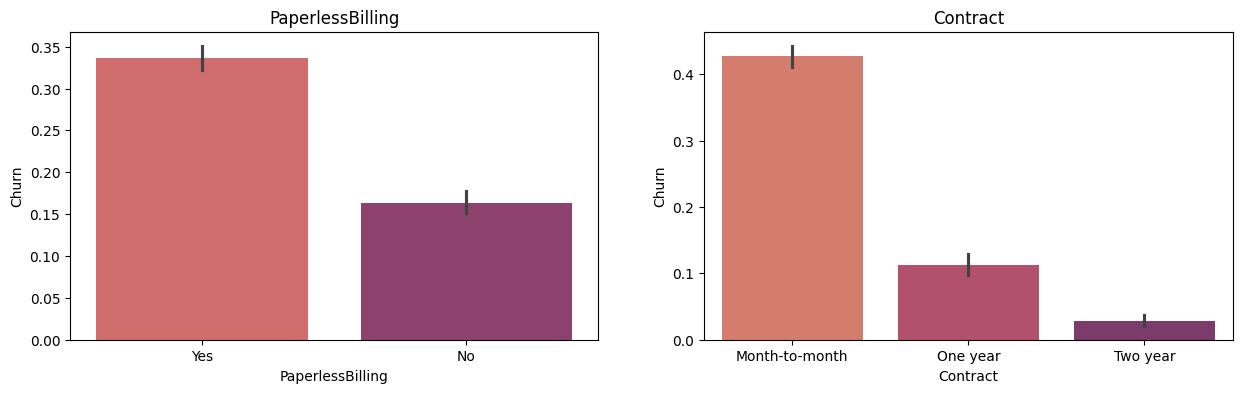

In [38]:
plt.figure(figsize=(15, 4))

#visualization PaperlessBilling with target 
plt.subplot(1, 2, 1)
sns.barplot(data=df, x = 'PaperlessBilling',  y='Churn', palette='flare')
plt.title('PaperlessBilling')

#visualization Contract with target 
plt.subplot(1, 2, 2)
sns.barplot(data=df, x = 'Contract',  y='Churn', palette='flare')
plt.title('Contract')

plt.show()

berdasarkan grafik tersebut, terdapat hubungan antara feature techsupport, paperbiling, dan contract dengan feature target. customer yang dikelompokkan sebagai customer churn merupakan customer yang berlangganan dalam kurun waktu satu sampai dua tahun. hal ini mengartikan bahwa mungkin customer tersebut merasakan pelayanan yang buruk terhadap pelayanan dari perusahan tersebut. hal tersebut dapat menjadi masukkan bagi perusahan untuk menarik customer - customer yang churn dengan meningkatkan pelayanan atau kualitas produk dari perusahan tersebut.

# 5. Feature Engineering

## 5.1 - Split Features(X) dan target (y)

In [39]:
# Memisahkan X semua kolom selain kolom price menjadi fitur dan y sebagai kolom price sbg kolom target
X = df.drop('Churn', axis=1)
y = df['Churn']

## 5.2 - Split Train set and Test set

In [40]:
# Split Train-Set & Test-set for Feature (X) & Target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) # data utk test-set 20% & train-set 80%

# Show shape of Feature (X) in Train-set & Test-set
print('Train size: ', X_train.shape)
print('Test size: ', X_test.shape)

# Show shape of Target (y) in Train-set & Test-set
print('Train size: ', y_train.shape)
print('Test size: ', y_test.shape)

Train size:  (5625, 20)
Test size:  (1407, 20)
Train size:  (5625,)
Test size:  (1407,)


## 5.3 - Feature Selection

In [41]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4750,0373-AIVNJ,Male,0,No,No,9,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,One year,No,Mailed check,39.55,373.00
1899,8563-OYMQY,Male,0,No,No,17,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),90.95,1612.20
3327,9494-BDNNC,Male,0,Yes,No,66,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,One year,No,Electronic check,95.30,6273.40
5125,2982-VPSGI,Female,0,Yes,No,11,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.00,1078.90
1788,7416-CKTEP,Female,0,Yes,No,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.60,1134.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6452,9529-OFXHY,Male,0,No,No,15,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),87.75,1242.20
3612,0491-KAPQG,Male,0,No,No,21,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,73.70,1558.70
5713,8050-DVOJX,Male,1,No,No,49,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),81.35,4060.90
6646,8249-THVEC,Male,0,Yes,Yes,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75


In [42]:
# Drop feature bill_amt

X_train.drop(columns=['customerID','gender', 'PhoneService', 'StreamingTV', 'StreamingMovies', 'MultipleLines'], axis=1, inplace=True)
X_test.drop(columns=['customerID', 'gender', 'PhoneService', 'StreamingTV', 'StreamingMovies', 'MultipleLines'], axis=1, inplace=True)

#Show x_Train aftre drop columns
X_train

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4750,0,No,No,9,DSL,Yes,Yes,Yes,No,One year,No,Mailed check,39.55,373.00
1899,0,No,No,17,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),90.95,1612.20
3327,0,Yes,No,66,Fiber optic,No,Yes,Yes,No,One year,No,Electronic check,95.30,6273.40
5125,0,Yes,No,11,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,94.00,1078.90
1788,0,Yes,No,57,No,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.60,1134.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6452,0,No,No,15,Fiber optic,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),87.75,1242.20
3612,0,No,No,21,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,73.70,1558.70
5713,1,No,No,49,DSL,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),81.35,4060.90
6646,0,Yes,Yes,51,No,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75


Melakukan drop sebanyak 6 fitur baik yang numerical maupun categorical karena 6 kolom tersebut memiliki nilai korelasi yg kecil dengan kolom target (Churn). Seperti yang telah saya jelaskan pada BAB EDA mengenai kolom mana saja yg memiliki korelasi yg kecil atau tidak memiliki korelasi dengan kolom Churn, sehingga menyisakan 14 fitur yang digunakan untuk model nanti.

## 5.4 - Handling Outlier

In [43]:
# Untuk melihat apakah distribusi normal atau skewness 
print('Distribution of column SeniorCitizen  : ', X_train['SeniorCitizen'].skew())
print('Distribution of column tenure  : ', X_train['tenure'].skew())
print('Distribution of column MonthlyCharges  : ', X_train['MonthlyCharges'].skew())
print('Distribution of column TotalCharges  : ', X_train['TotalCharges'].skew())

Distribution of column SeniorCitizen  :  1.823253271122996
Distribution of column tenure  :  0.24224928597684775
Distribution of column MonthlyCharges  :  -0.21746994483926665
Distribution of column TotalCharges  :  0.9686903650242794


Distribusi normal akan memiliki kemencengan mulai dari `-0,5` hingga `0,5`. Distribusi di luar kisaran ini dianggap Skewed distribution

`Normal Distribution:` Tenure & MonthlyCharges

`Skewed distribution:` SeniorCitizen & TotalCharges.

In [44]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

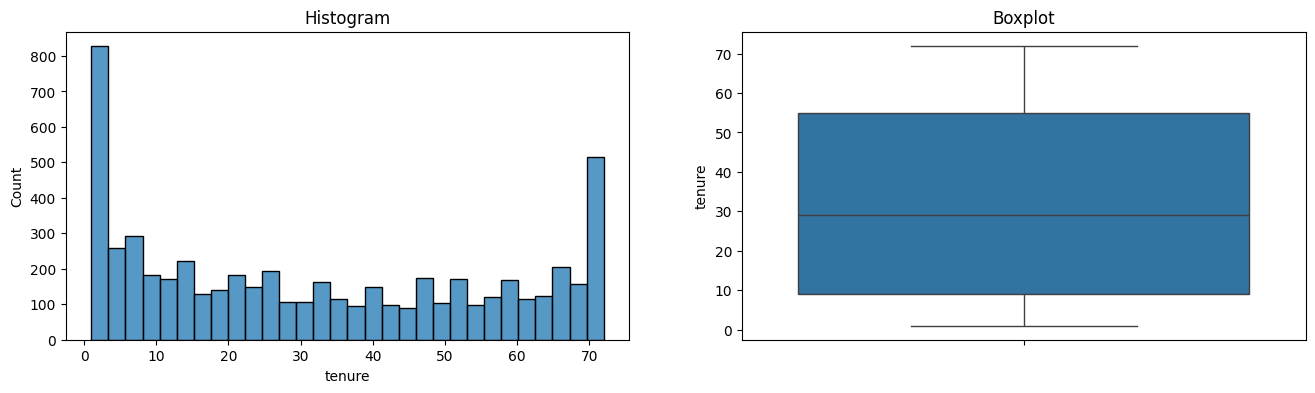

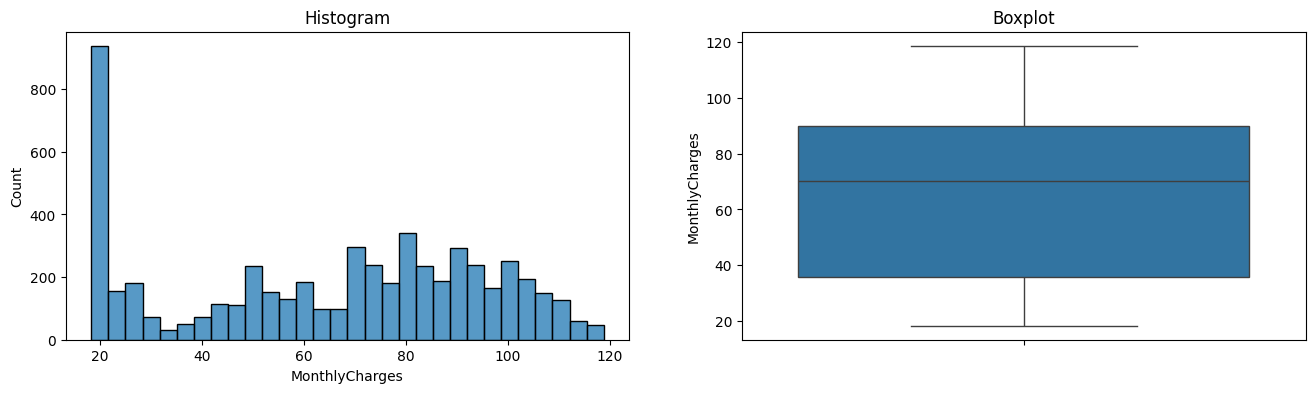

In [45]:
# Menampilkan visualisasi distribusi normal dengan boxplot
diagnostic_plots(X_train, 'tenure')
diagnostic_plots(X_train, 'MonthlyCharges')

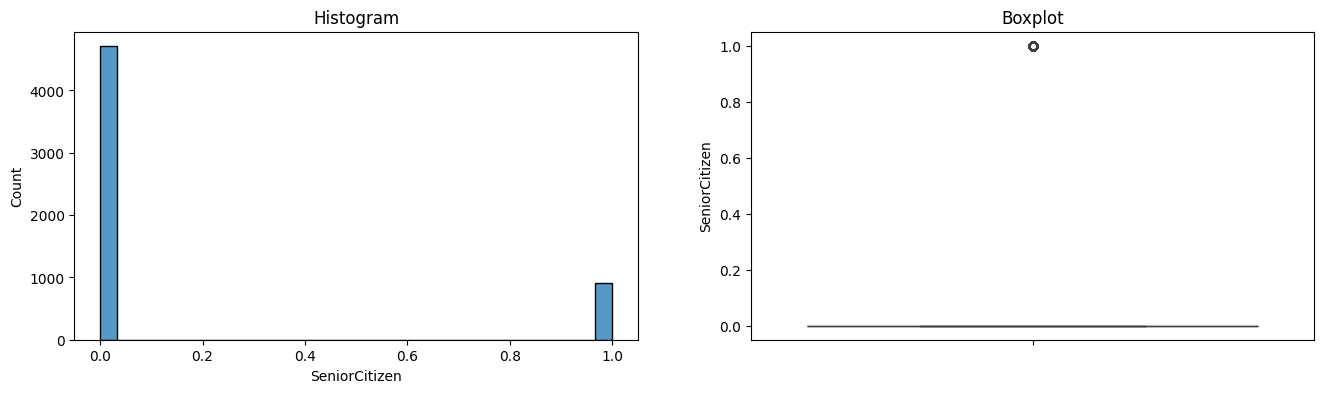

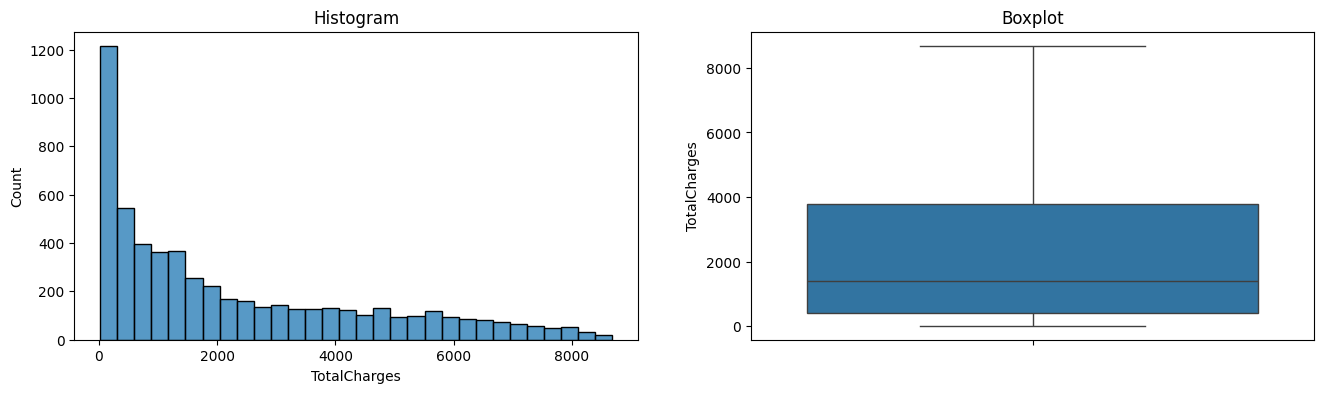

In [46]:
# Menampilkan visualisasi distribusi skew dengan boxplot before handling outlier
diagnostic_plots(X_train, 'SeniorCitizen')
diagnostic_plots(X_train, 'TotalCharges')

Setelah dilakukan pengecekan outlier pada data numerical yg skew dan normal, dapat dilihat dari visualisasi diatas bahwa tidak ada outlier sehingga tidak dilakukan handling outlier karena outlier dianggap semua nilai pada setiap kolom dalam ambang batas distribusi normal.

## 5.5 - Handling Missing Values

In [47]:
# Check X_train
X_train.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [48]:
# Check X_test
X_test.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [49]:
# Check y_train
y_train.isnull().sum()

0

In [50]:
# Check y_test

y_test.isnull().sum()

0

**Statement** : Pada X_train, X_test, y_train & y_test tidak terdapat missing value.

## 5.6 - Imbalance Handling

In [51]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

Dilakukan pengecekan pada kolom target, dapat dilihat bawah antara nilai target 0 dan 1 jumlahnya berbeda, dan sebelumnya juga dianalisa pada EDA bahwa perbandingan kolom target 1:3, dimana bisa dikatakan seimbang bisa dikatakan tidak, itu subjektif. Tetapi karena saya ingin mendapatkan nilai recall yg baik dan tidak bias dalam melakukan prediction, maka saya melakukan SMOTENC

In [52]:
undersample = RandomUnderSampler(sampling_strategy=0.6, random_state=42)

oversample = SMOTENC([1, 2, 4, 5, 6, 7, 8, 9, 10, 11], k_neighbors= 5, random_state = 42)


sampling_pipeline = Pipeline([('undersample', undersample), ('oversample', oversample)])


X_train_resampled, y_train_resampled = sampling_pipeline.fit_resample(X_train, y_train)

Dilakukan imbalance handling menggunakan 2 metode yaitu undersample & oversample menggunakan SMOTENC utk mendapatkan data yg seimbang

In [53]:
y_train_resampled.value_counts()

Churn
0    2491
1    2491
Name: count, dtype: int64

Setelah dilakukan imbalance handling, dapat dilihat data menjadi seimbang nilai 0 dan 1 sebanyak 2491

In [54]:
y_test.value_counts()

Churn
0    1033
1     374
Name: count, dtype: int64

dapat dilihat bahawa data untuk dilatih lebih banyak daripada data test, hal ini akan membuat model lebih banyak berlatih dulu sebelum test.

In [56]:
# Untuk melihat apakah distribusi normal atau skewness 
print('Distribution of column SeniorCitizen  : ', X_train_resampled['SeniorCitizen'].skew())
print('Distribution of column tenure  : ', X_train_resampled['tenure'].skew())
print('Distribution of column MonthlyCharges  : ', X_train_resampled['MonthlyCharges'].skew())
print('Distribution of column TotalCharges  : ', X_train_resampled['TotalCharges'].skew())

Distribution of column SeniorCitizen  :  1.9097187958842812
Distribution of column tenure  :  0.5216824063179296
Distribution of column MonthlyCharges  :  -0.40199046008384676
Distribution of column TotalCharges  :  1.1242980872123054


Distribusi normal akan memiliki kemencengan mulai dari `-0,5` hingga `0,5`. Distribusi di luar kisaran ini dianggap Skewed distribution

`Normal Distribution:` MonthlyCharges

`Skewed distribution:` Tenure, SeniorCitizen & TotalCharges.

## 5.7 - Pipeline 

Untuk mencegah kebocoran data maka saya mengggunakan pipeline.

In [57]:
# Numerical Pipeline
numeric_transformer_1 = Pipeline([
    ('scaler_n', StandardScaler())
])

numeric_transformer_2 = Pipeline([
    ('scaler_s', MinMaxScaler())
])

# Categorcial Nominal Pipeline
categorical_transformer_1 = Pipeline([
    ('encoder_n', OneHotEncoder())
])

# Split numerical column and categorical column
num_col_n = ['MonthlyCharges']
num_col_s = ['SeniorCitizen', 'TotalCharges', 'tenure']
cat_col_n = ['Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']

## 5.8 - Making a Preprocessing

Dilakukan penggabungan antara data numerical dan categorical.

In [58]:
# define preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_n', numeric_transformer_1, num_col_n),
    ('num_s', numeric_transformer_2, num_col_s),
    ('cat_n', categorical_transformer_1, cat_col_n)
])

# 6. Model Definition

Pada bab ini, saya membuat beberapa model untuk melihat model mana yang memiliki performa terbaik untuk data ini. Model yang dibuat adalah K-Nearest Neighbors , Support Vector Machine, Decision Tree, Random Forest dan AdaBoosting.

## 6.1 - Model KNN

In [59]:
# Define the pipeline with preprocessing and classification steps
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_knn', KNeighborsClassifier())
])

## 6.2 - Model SVM

In [60]:
# Define the pipeline with preprocessing and classification steps
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_svm', SVC())
])

## 6.3 - Model Decision Tree

In [61]:
# Define the pipeline with preprocessing and classification steps
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_dt', DecisionTreeClassifier())
])

## 6.4 - Model Random Forest

In [62]:
# Define the pipeline with preprocessing and classification steps
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_rf', RandomForestClassifier())
])

## 6.5 - Model Adaboosting

In [63]:
# Define the pipeline with preprocessing and classification steps
pipeline_ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_ada', AdaBoostClassifier())
])

# 7. Model Training

## 7.1 - Model KNN

In [64]:
# model training KNeighborsClassifier
pipeline_knn.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges']),
                                                 ('num_s',
                                                  Pipeline(steps=[('scaler_s',
                                                                   MinMaxScaler())]),
                                                  ['SeniorCitizen',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder())]),
                                                  ['Partner', 'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier_knn', KNeighborsClassifier())])

## 7.2 - Model SVM

In [65]:
# model training SVM
pipeline_svm.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges']),
                                                 ('num_s',
                                                  Pipeline(steps=[('scaler_s',
                                                                   MinMaxScaler())]),
                                                  ['SeniorCitizen',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder())]),
                                                  ['Partner', 'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier_svm', SVC())])

## 7.3 - Model Decision Tree

In [66]:
# model training DecisionTreeClassifier
pipeline_dt.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges']),
                                                 ('num_s',
                                                  Pipeline(steps=[('scaler_s',
                                                                   MinMaxScaler())]),
                                                  ['SeniorCitizen',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder())]),
                                                  ['Partner', 'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier_dt', DecisionTreeClassifier())])

## 7.4 - Model Random Forest

In [67]:
# model training RandomForestClassifier
pipeline_rf.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges']),
                                                 ('num_s',
                                                  Pipeline(steps=[('scaler_s',
                                                                   MinMaxScaler())]),
                                                  ['SeniorCitizen',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder())]),
                                                  ['Partner', 'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier_rf', RandomForestClassifier())])

## 7.5 - Model AdaBoost Classifier

In [68]:
# model training AdaBoostClassifier
pipeline_ada.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges']),
                                                 ('num_s',
                                                  Pipeline(steps=[('scaler_s',
                                                                   MinMaxScaler())]),
                                                  ['SeniorCitizen',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder())]),
                                                  ['Partner', 'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier_ada', AdaBoostClassifier())])

# 8. Model Evaluation

Pada kasus ini saya menggunakan metric `recall`. `Recall` merupakan proporsi positif aktual yang berhasil diprediksi dengan benar oleh model. Dalam kasus churn, recall yang tinggi menunjukkan bahwa model mampu menangkap sebagian besar pelanggan yang sebenarnya akan churn. Hal ini penting karena kita ingin meminimalkan jumlah pelanggan yang sebenarnya churn tetapi diprediksi tidak churn (false negative), sehingga recall yang tinggi merupakan hal yang diinginkan dalam konteks ini.

In [69]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train_resampled, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train_resampled, y_pred_train),
      'train - recall' : recall_score(y_train_resampled, y_pred_train),
      'train - accuracy' : accuracy_score(y_train_resampled, y_pred_train),
      'train - f1_score' : f1_score(y_train_resampled, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

## 8.1 Model Evaluation KNN

In [70]:
# Predict Train and Test set
y_train_pred_knn = pipeline_knn.predict(X_train_resampled)
y_test_pred_knn = pipeline_knn.predict(X_test)

# Check Performance Baseline Model against Train-Set
print('Recall Score - Train Set  : ', recall_score(y_train_resampled, y_train_pred_knn), '\n')
print('Classification Report : \n', classification_report(y_train_resampled, y_train_pred_knn), '\n')

# Check Performance Baseline Model against Test-Set
print('Recall Score - Test Set  : ', recall_score(y_test, y_test_pred_knn), '\n')
print('Classification Report : \n', classification_report(y_test, y_test_pred_knn), '\n')

Recall Score - Train Set  :  0.8779606583701325 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      2491
           1       0.81      0.88      0.84      2491

    accuracy                           0.83      4982
   macro avg       0.84      0.83      0.83      4982
weighted avg       0.84      0.83      0.83      4982
 

Recall Score - Test Set  :  0.7192513368983957 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.73      0.80      1033
           1       0.50      0.72      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.73      0.74      1407
 



In [71]:
all_reports = performance_report(all_reports, y_train_resampled, y_train_pred_knn, y_test, y_test_pred_knn,"KNN (Baseline)")
pd.DataFrame(all_reports)

,KNN (Baseline)
test - accuracy_score,0.730633
test - f1_score,0.586696
test - precision,0.495396
test - recall,0.719251
train - accuracy,0.833802
train - f1_score,0.840830
train - precision,0.806713
train - recall,0.877961


In [72]:
recall_train_cross_val_knn = cross_val_score(pipeline_knn,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation Rain Forest    : ', recall_train_cross_val_knn)
print('Recall Score - Mean - Cross Validation Rain Forest   : ', recall_train_cross_val_knn.mean())
print('Recall Score - Std - Cross Validation Rain Forest    : ', recall_train_cross_val_knn.std())
print('Recall Score - Range of Test-Set Rain Forest         : ', (recall_train_cross_val_knn.mean()-recall_train_cross_val_knn.std()) , '-', (recall_train_cross_val_knn.mean()+recall_train_cross_val_knn.std()))

Recall Score - All - Cross Validation Rain Forest    :  [0.68674699 0.74488568 0.9060241 ]
Recall Score - Mean - Cross Validation Rain Forest   :  0.7792189214136932
Recall Score - Std - Cross Validation Rain Forest    :  0.09275304550328277
Recall Score - Range of Test-Set Rain Forest         :  0.6864658759104104 - 0.871971966916976


## 8.2 Model Evaluation SVM

In [73]:
# Predict Train and Test set
y_train_pred_svm = pipeline_svm.predict(X_train_resampled)
y_test_pred_svm = pipeline_svm.predict(X_test)

# Check Performance Baseline Model against Train-Set
print('Recall Score - Train Set  : ', recall_score(y_train_resampled, y_train_pred_svm), '\n')
print('Classification Report : \n', classification_report(y_train_resampled, y_train_pred_svm), '\n')

# Check Performance Baseline Model against Test-Set
print('Recall Score - Test Set  : ', recall_score(y_test, y_test_pred_svm), '\n')
print('Classification Report : \n', classification_report(y_test, y_test_pred_svm), '\n')

Recall Score - Train Set  :  0.8121236451224408 

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      2491
           1       0.78      0.81      0.80      2491

    accuracy                           0.79      4982
   macro avg       0.79      0.79      0.79      4982
weighted avg       0.79      0.79      0.79      4982
 

Recall Score - Test Set  :  0.7058823529411765 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.76      0.81      1033
           1       0.52      0.71      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.75      0.76      1407
 



In [74]:
all_reports = performance_report(all_reports, y_train_resampled, y_train_pred_svm, y_test, y_test_pred_svm,"SVM (Baseline)")
pd.DataFrame(all_reports)

,KNN (Baseline),SVM (Baseline)
train - precision,0.806713,0.782592
train - recall,0.877961,0.812124
train - accuracy,0.833802,0.793256
train - f1_score,0.840830,0.797084
test - precision,0.495396,0.515625
test - recall,0.719251,0.705882
test - accuracy_score,0.730633,0.745558
test - f1_score,0.586696,0.595937


In [75]:
recall_train_cross_val_svm = cross_val_score(pipeline_svm,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation Rain Forest    : ', recall_train_cross_val_svm)
print('Recall Score - Mean - Cross Validation Rain Forest   : ', recall_train_cross_val_svm.mean())
print('Recall Score - Std - Cross Validation Rain Forest    : ', recall_train_cross_val_svm.std())
print('Recall Score - Range of Test-Set Rain Forest         : ', (recall_train_cross_val_svm.mean()-recall_train_cross_val_svm.std()) , '-', (recall_train_cross_val_svm.mean()+recall_train_cross_val_svm.std()))

Recall Score - All - Cross Validation Rain Forest    :  [0.67951807 0.73646209 0.87710843]
Recall Score - Mean - Cross Validation Rain Forest   :  0.7643628666289707
Recall Score - Std - Cross Validation Rain Forest    :  0.08304347285119307
Recall Score - Range of Test-Set Rain Forest         :  0.6813193937777776 - 0.8474063394801638


## 8.3 Model Evaluation Decision Tree 

In [76]:
# Predict Train and Test set
y_train_pred_dt = pipeline_dt.predict(X_train_resampled)
y_test_pred_dt = pipeline_dt.predict(X_test)

# Check Performance Baseline Model against Train-Set
print('Recall Score - Train Set  : ', recall_score(y_train_resampled, y_train_pred_dt), '\n')
print('Classification Report : \n', classification_report(y_train_resampled, y_train_pred_dt), '\n')

# Check Performance Baseline Model against Test-Set
print('Recall Score - Test Set  : ', recall_score(y_test, y_test_pred_dt), '\n')
print('Classification Report : \n', classification_report(y_test, y_test_pred_dt), '\n')

Recall Score - Train Set  :  0.9963869931754316 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2491
           1       1.00      1.00      1.00      2491

    accuracy                           1.00      4982
   macro avg       1.00      1.00      1.00      4982
weighted avg       1.00      1.00      1.00      4982
 

Recall Score - Test Set  :  0.6577540106951871 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.74      0.79      1033
           1       0.47      0.66      0.55       374

    accuracy                           0.71      1407
   macro avg       0.66      0.70      0.67      1407
weighted avg       0.75      0.71      0.73      1407
 



In [77]:
all_reports = performance_report(all_reports, y_train_resampled, y_train_pred_dt, y_test, y_test_pred_dt,"Decision Tree (Baseline)")
pd.DataFrame(all_reports)

,KNN (Baseline),SVM (Baseline),Decision Tree (Baseline)
train - precision,0.806713,0.782592,0.998793
train - recall,0.877961,0.812124,0.996387
train - accuracy,0.833802,0.793256,0.997591
train - f1_score,0.840830,0.797084,0.997588
test - precision,0.495396,0.515625,0.473988
test - recall,0.719251,0.705882,0.657754
test - accuracy_score,0.730633,0.745558,0.714996
test - f1_score,0.586696,0.595937,0.550952


In [78]:
recall_train_cross_val_dt = cross_val_score(pipeline_dt,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation Rain Forest    : ', recall_train_cross_val_dt)
print('Recall Score - Mean - Cross Validation Rain Forest   : ', recall_train_cross_val_dt.mean())
print('Recall Score - Std - Cross Validation Rain Forest    : ', recall_train_cross_val_dt.std())
print('Recall Score - Range of Test-Set Rain Forest         : ', (recall_train_cross_val_dt.mean()-recall_train_cross_val_dt.std()) , '-', (recall_train_cross_val_dt.mean()+recall_train_cross_val_dt.std()))

Recall Score - All - Cross Validation Rain Forest    :  [0.63493976 0.67870036 0.85301205]
Recall Score - Mean - Cross Validation Rain Forest   :  0.7222173894132488
Recall Score - Std - Cross Validation Rain Forest    :  0.09419546926554907
Recall Score - Range of Test-Set Rain Forest         :  0.6280219201476996 - 0.8164128586787979


## 8.4 Model Evaluation Random Forest

In [79]:
# Predict Train and Test set
y_train_pred_rf = pipeline_rf.predict(X_train_resampled)
y_test_pred_rf = pipeline_rf.predict(X_test)

# Check Performance Baseline Model against Train-Set
print('Recall Score - Train Set  : ', recall_score(y_train_resampled, y_train_pred_rf), '\n')
print('Classification Report : \n', classification_report(y_train_resampled, y_train_pred_rf), '\n')

# Check Performance Baseline Model against Test-Set
print('Recall Score - Test Set  : ', recall_score(y_test, y_test_pred_rf), '\n')
print('Classification Report : \n', classification_report(y_test, y_test_pred_rf), '\n')

Recall Score - Train Set  :  0.9979927739863509 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2491
           1       1.00      1.00      1.00      2491

    accuracy                           1.00      4982
   macro avg       1.00      1.00      1.00      4982
weighted avg       1.00      1.00      1.00      4982
 

Recall Score - Test Set  :  0.6844919786096256 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1033
           1       0.54      0.68      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407
 



In [80]:
all_reports = performance_report(all_reports, y_train_resampled, y_train_pred_rf, y_test, y_test_pred_rf,"Random Forest (Baseline)")
pd.DataFrame(all_reports)

,KNN (Baseline),SVM (Baseline),Decision Tree (Baseline),Random Forest (Baseline)
train - precision,0.806713,0.782592,0.998793,0.997192
train - recall,0.877961,0.812124,0.996387,0.997993
train - accuracy,0.833802,0.793256,0.997591,0.997591
train - f1_score,0.840830,0.797084,0.997588,0.997592
test - precision,0.495396,0.515625,0.473988,0.542373
test - recall,0.719251,0.705882,0.657754,0.684492
test - accuracy_score,0.730633,0.745558,0.714996,0.762615
test - f1_score,0.586696,0.595937,0.550952,0.605201


In [81]:
recall_train_cross_val_rf = cross_val_score(pipeline_rf,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation Rain Forest    : ', recall_train_cross_val_rf)
print('Recall Score - Mean - Cross Validation Rain Forest   : ', recall_train_cross_val_rf.mean())
print('Recall Score - Std - Cross Validation Rain Forest    : ', recall_train_cross_val_rf.std())
print('Recall Score - Range of Test-Set Rain Forest         : ', (recall_train_cross_val_rf.mean()-recall_train_cross_val_rf.std()) , '-', (recall_train_cross_val_rf.mean()+recall_train_cross_val_rf.std()))

Recall Score - All - Cross Validation Rain Forest    :  [0.6313253  0.72202166 0.89277108]
Recall Score - Mean - Cross Validation Rain Forest   :  0.7487060153973294
Recall Score - Std - Cross Validation Rain Forest    :  0.10838977648795639
Recall Score - Range of Test-Set Rain Forest         :  0.6403162389093731 - 0.8570957918852857


## 8.5 Model Evaluation AdaBoost

In [82]:
# Predict Train and Test set
y_train_pred_ada = pipeline_ada.predict(X_train_resampled)
y_test_pred_ada = pipeline_ada.predict(X_test)

# Check Performance Baseline Model against Train-Set
print('Recall Score - Train Set  : ', recall_score(y_train_resampled, y_train_pred_ada), '\n')
print('Classification Report : \n', classification_report(y_train_resampled, y_train_pred_ada), '\n')

# Check Performance Baseline Model against Test-Set
print('Recall Score - Test Set  : ', recall_score(y_test, y_test_pred_ada), '\n')
print('Classification Report : \n', classification_report(y_test, y_test_pred_ada), '\n')

Recall Score - Train Set  :  0.8438378161380972 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.74      0.78      2491
           1       0.77      0.84      0.80      2491

    accuracy                           0.79      4982
   macro avg       0.80      0.79      0.79      4982
weighted avg       0.80      0.79      0.79      4982
 

Recall Score - Test Set  :  0.8048128342245989 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1033
           1       0.53      0.80      0.64       374

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.75      0.77      1407
 



In [83]:
all_reports = performance_report(all_reports, y_train_resampled, y_train_pred_ada, y_test, y_test_pred_ada,"AdaBoost (Baseline)")
pd.DataFrame(all_reports)

,KNN (Baseline),SVM (Baseline),Decision Tree (Baseline),Random Forest (Baseline),AdaBoost (Baseline)
train - precision,0.806713,0.782592,0.998793,0.997192,0.766035
train - recall,0.877961,0.812124,0.996387,0.997993,0.843838
train - accuracy,0.833802,0.793256,0.997591,0.997591,0.793055
train - f1_score,0.840830,0.797084,0.997588,0.997592,0.803056
test - precision,0.495396,0.515625,0.473988,0.542373,0.525305
test - recall,0.719251,0.705882,0.657754,0.684492,0.804813
test - accuracy_score,0.730633,0.745558,0.714996,0.762615,0.754797
test - f1_score,0.586696,0.595937,0.550952,0.605201,0.635692


In [84]:
recall_train_cross_val_ada = cross_val_score(pipeline_ada,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation Rain Forest    : ', recall_train_cross_val_ada)
print('Recall Score - Mean - Cross Validation Rain Forest   : ', recall_train_cross_val_ada.mean())
print('Recall Score - Std - Cross Validation Rain Forest    : ', recall_train_cross_val_ada.std())
print('Recall Score - Range of Test-Set Rain Forest         : ', (recall_train_cross_val_ada.mean()-recall_train_cross_val_ada.std()) , '-', (recall_train_cross_val_ada.mean()+recall_train_cross_val_ada.std()))

Recall Score - All - Cross Validation Rain Forest    :  [0.75060241 0.80625752 0.9060241 ]
Recall Score - Mean - Cross Validation Rain Forest   :  0.8209613423610205
Recall Score - Std - Cross Validation Rain Forest    :  0.06429684776348836
Recall Score - Range of Test-Set Rain Forest         :  0.7566644945975322 - 0.8852581901245088


**MODEL EVALUATION BASELINE MODEL**

Pada kasus kali ini sebagai pihak perusahaan tentu saja kita tidak ingin sampai terjadi salah klasifikasi customer. Ketika ada customer yang churn namun kita klasifikasi sebagai non-churn (False Negatif), perusahaan akan mengalami kerugian karena layanan yang telah diberikan seperti layanan internet dan yang lainnya tidak akan kembali. 

 Sehingga dari kelima `model baseline` dapat disimpulkan bahwa:

**KNN BASELINE**

- Train Recall: 0.877961
- Test Recall: 0.719251
- Mean Croos Validation: 0.7792
- Model KNN memiliki nilai recall yang tinggi pada data train, tetapi terdapat selisih yang signifikan dengan nilai recall pada data test, hal itu menunjukkan kemungkinan overfitting. Ini mengindikasikan bahwa model KNN mungkin tidak secara optimal dalam menggeneralisasi ke data baru.
- Dengan nilai cross validation yg cukup tinggi pada model ini, dapat dikatakan mampu dengan baik dalam mengidentifikasi pelanggan yang sebenarnya akan churn, sehinggga model dapat digunakan sebagai refrensi utk dapat digunakan.
- Meskipun nilai cross validation sedikit lebih rendah dari model KNN, SVM tetap merupakan pilihan yang baik sebagai baseline model

**SVM BASELINE**

 - Train Recall: 0.812124
 - Test Recall: 0.705882
 - Mean Croos Validation: 0.7644
 - Model SVM memiliki nilai recall yang tinggi pada data train, tetapi nilai recall pada data test sedikit lebih rendah dengan selisih antara kedua nilai recall antara train & test ini relatif kecil, sehingga hal itu menunjukkan bahwa model SVM mungkin cukup baik dalam menggeneralisasi ke data baru.
 - Meskipun nilai cross validation sedikit lebih rendah dari model KNN, SVM tetap merupakan pilihan yang baik sebagai baseline model

**Decision Tree BASELINE**

- Train Recall: 0.996387
- Test Recall: 0.628342
- Mean Croos Validation: 0.7206
- Model Decision Tree memiliki nilai recall yang sangat tinggi pada data train, tetapi terdapat selisih yang signifikan dengan nilai recall pada data test. Hal ini menunjukkan adanya overfitting yang besar, di mana model memiliki performa yang sangat baik pada data train tetapi gagal untuk menggeneralisasi dengan baik ke data baru.
- Model Decision Tree memiliki nilai cross validation yang lebih rendah dari KNN dan SVM. Hal ini mungkin disebabkan oleh kecenderungan model untuk overfitting, 

**Random Forest BASELINE**

- Train Recall: 0.997993
- Test Recall: 0.684492
- Mean Croos Validation: 0.7479
- Model Random Forest juga memiliki nilai recall yang tinggi pada data train, tetapi terdapat penurunan performa yang cukup besar pada data test. Meskipun selisih antara kedua nilai recall tidak sebesar model Decision Tree masih terdapat indikasi overfitting.
- Random Forest menunjukkan nilai cross validation yang sedikit lebih tinggi dibandingkan dengan Decision Tree, tetapi masih di bawah KNN dan SVM. 

**AdaBoost BASELINE**

- Train Recall: 0.843838
- Test Recall: 0.804813
- Mean Croos Validation: 0.8210
- Model AdaBoost memiliki nilai recall yang tinggi baik pada data train maupun data test & selisih antara kedua nilai recall ini relatif kecil dapat dikatakan pada model ini adalah goodfit, sehingga menunjukkan bahwa model AdaBoost mungkin mampu menggeneralisasi dengan baik ke data baru, tanpa menunjukkan tanda-tanda overfitting yang signifikan.
- Model AdaBoost paling menonjol dengan nilai croos validation yang tertinggi dari semua model yang dievaluasi.

Dengan demikian, berdasarkan insight dari perbandingan metric recall pada perbandingan nilai train, test dan croos validation, `AdaBoost Baseline` kemungkinan merupakan pilihan yang lebih baik di antara kelima model untuk dataset ini. Dengan menggunakan model Adaboost dengan recall yang tinggi dan tidak berbeda jauh antara nilai train & test & nilai cross validation yg tinggi juga dapat dikatakan model goodfit, cenderung memiliki jumlah false negative yang lebih rendah dibandingkan dengan model lainnya, karena mampu menangkap sebagian besar pelanggan yang akan churn.

Dengan tujuan meminimalisir False Negatives, dalam konteks prediksi churn kesalahan yang paling berpotensi merugikan adalah ketika model gagal memprediksi pelanggan yang sebenarnya akan churn (false negative), karena hal ini dapat mengakibatkan kehilangan pelanggan yang berharga bagi bisnis.

# 9. Model Improvement

Setelah saya mendapatkan baseline model yg terbaik dari 5 model yaitu model `Adaboost`. Untuk memperoleh hasil yg terbaik lagi dari model maka saya melakukan improvement/tuning.

In [85]:
start_time = time.time()

# Define the parameter grid for GridSearchCV
param_grid_ada = {
    'classifier_ada__n_estimators': [50, 100, 150], # Jumlah estimator
    'classifier_ada__learning_rate': [0.01, 0.1, 0.5, 1.0],  # Tingkat pembelajaran
    'classifier_ada__algorithm' : ['SAMME', 'SAMME.R']
}

In [86]:
start_time = time.time()

# Create a GridSearchCV object
grid_ada = GridSearchCV(pipeline_ada, 
                       param_grid=param_grid_ada,
                       verbose=3, 
                       refit=True, 
                       scoring ='recall', 
                       cv=5, 
                       return_train_score=True, 
                       n_jobs=2)

# Fit the GridSearchCV object to the training data
grid_ada.fit(X_train_resampled, y_train_resampled) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_n',
                                                                         Pipeline(steps=[('scaler_n',
                                                                                          StandardScaler())]),
                                                                         ['MonthlyCharges']),
                                                                        ('num_s',
                                                                         Pipeline(steps=[('scaler_s',
                                                                                          MinMaxScaler())]),
                                                                         ['SeniorCitizen',
                                                                          'TotalCharges',
                                                                          'tenure']),
                                                                        ('cat_n',
                                                                         Pipeline(steps=[('encoder_n',
                                                                                          OneHotEncoder())]),
                                                                         ['Partner',
                                                                          'Dependents',
                                                                          'I...
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('classifier_ada',
                                        AdaBoostClassifier())]),
             n_jobs=2,
             param_grid={'classifier_ada__algorithm': ['SAMME', 'SAMME.R'],
                         'classifier_ada__learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'classifier_ada__n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='recall', verbose=3)

In [87]:
# Print the best parameters and the corresponding accuracy score
print("Best parameters:", grid_ada.best_params_) # Get Best Hyperparameters
print("Best Precision score:", grid_ada.best_score_)

Best parameters: {'classifier_ada__algorithm': 'SAMME', 'classifier_ada__learning_rate': 0.01, 'classifier_ada__n_estimators': 50}
Best Precision score: 0.9072755953674416


In [88]:
# Get Best Estimator
ada_gridcv_best = grid_ada.best_estimator_

In [89]:
# Predict Tuning Train and Test set
y_train_pred_ada_improve = ada_gridcv_best.predict(X_train_resampled)
y_test_pred_ada_improve = ada_gridcv_best.predict(X_test)

# Check Performance Baseline Model against Train-Set
print('Recall Score - Train Set  : ', recall_score(y_train_resampled, y_train_pred_ada_improve), '\n')
print('Classification Report : \n', classification_report(y_train_resampled, y_train_pred_ada_improve), '\n')

# Check Performance Baseline Model against Test-Set
print('Recall Score - Test Set  : ', recall_score(y_test, y_test_pred_ada_improve), '\n')
print('Classification Report : \n', classification_report(y_test, y_test_pred_ada_improve), '\n')

Recall Score - Train Set  :  0.9072661581694099 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.56      0.68      2491
           1       0.67      0.91      0.77      2491

    accuracy                           0.73      4982
   macro avg       0.76      0.73      0.72      4982
weighted avg       0.76      0.73      0.72      4982
 

Recall Score - Test Set  :  0.8770053475935828 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.57      0.71      1033
           1       0.42      0.88      0.57       374

    accuracy                           0.65      1407
   macro avg       0.68      0.72      0.64      1407
weighted avg       0.79      0.65      0.67      1407
 



In [90]:
all_reports = performance_report(all_reports, y_train_resampled, y_train_pred_ada_improve, y_test, y_test_pred_ada_improve,"AdaBoost (improve)")
pd.DataFrame(all_reports)

,KNN (Baseline),SVM (Baseline),Decision Tree (Baseline),Random Forest (Baseline),AdaBoost (Baseline),AdaBoost (improve)
train - precision,0.806713,0.782592,0.998793,0.997192,0.766035,0.672019
train - recall,0.877961,0.812124,0.996387,0.997993,0.843838,0.907266
train - accuracy,0.833802,0.793256,0.997591,0.997591,0.793055,0.732236
train - f1_score,0.840830,0.797084,0.997588,0.997592,0.803056,0.772122
test - precision,0.495396,0.515625,0.473988,0.542373,0.525305,0.424870
test - recall,0.719251,0.705882,0.657754,0.684492,0.804813,0.877005
test - accuracy_score,0.730633,0.745558,0.714996,0.762615,0.754797,0.651741
test - f1_score,0.586696,0.595937,0.550952,0.605201,0.635692,0.572426


In [91]:
recall_train_cross_val_ada_improve = cross_val_score(ada_gridcv_best,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation Rain Forest    : ', recall_train_cross_val_ada_improve)
print('Recall Score - Mean - Cross Validation Rain Forest   : ', recall_train_cross_val_ada_improve.mean())
print('Recall Score - Std - Cross Validation Rain Forest    : ', recall_train_cross_val_ada_improve.std())
print('Recall Score - Range of Test-Set Rain Forest         : ', (recall_train_cross_val_ada_improve.mean()-recall_train_cross_val_ada_improve.std()) , '-', (recall_train_cross_val_ada_improve.mean()+recall_train_cross_val_ada_improve.std()))

Recall Score - All - Cross Validation Rain Forest    :  [0.88554217 0.89049338 0.94578313]
Recall Score - Mean - Cross Validation Rain Forest   :  0.90727289422431
Recall Score - Std - Cross Validation Rain Forest    :  0.02730576822833282
Recall Score - Range of Test-Set Rain Forest         :  0.8799671259959772 - 0.9345786624526429


**MODEL EVALUATION IMPROVE MODEL**

Pada kasus kali ini sebagai pihak perusahaan tentu saja kita tidak ingin sampai terjadi salah klasifikasi customer. Ketika ada customer yang churn namun kita klasifikasi sebagai non-churn (False Negatif), perusahaan akan mengalami kerugian karena layanan yang telah diberikan seperti layanan internet dan yang lainnya tidak akan kembali. `Sehingga setelah dilakukan improve/tuning dari baseline model (Adaboost Baseline) yg terbaik dapat disimpulkan bahwa:

**Adaboost IMPROVE**

- Train Recall: 0.907266
- Test Recall: 0.877005
- Mean Cross-Validation: 0.9073
- Setelah dilakukan tuning/improve, nilai train recall meningkat dari sekitar 0.844 menjadi sekitar 0.907, nilai test recall juga meningkat secara signifikan setelah dilakukan tuning/improve dari sekitar 0.805 menjadi sekitar 0.877. Nilai mean cross-validation dari yg Baseline model nilainya 0.8209, model Adaboost setelah di tuning/improve meningkat menjadi sekitar 0.907. 
- Improvisasi model Adaboost telah menghasilkan peningkatan yang signifikan dalam kemampuan model untuk mengidentifikasi pelanggan yang akan churn, hal itu dapat dibuktikan dengan meningkatnya pada nilai train, nilai test & croos validation.
- Improvisasi model adalah langkah yang penting dalam pengembangan model prediksi churn yang efektif, dan hasil yang diperoleh menunjukkan bahwa tuning model Adaboost telah berhasil meningkatkan performa model secara signifikan

# 10. Modul Analysis

Saya telah menganalisis hasil dari berbagai model yang telah saya latih dan evaluasi untuk projek ini yaitu memprediksi perilaku customers untuk mengetahui apakah pelanggan melakukan churn atau tidak. Model yang saya gunakan dalam proyek ini adalah k-nearest neighbors (KNN), support vector machine (SVM), , Decision Tree, Random Forest dan AdaBoosting. Saya menganailisa model baseline dan saya juga telah melakukan tuning untuk setiap model untuk menemukan hyperparameter terbaik. Saya berfokus pada metric `recall`.`Recall` merupakan proporsi positif aktual yang berhasil diprediksi dengan benar oleh model. Dalam kasus churn, recall yang tinggi menunjukkan bahwa model mampu menangkap sebagian besar pelanggan yang sebenarnya akan churn. Hal ini penting karena kita ingin meminimalkan jumlah pelanggan yang sebenarnya churn tetapi diprediksi tidak churn (false negative), sehingga recall yang tinggi merupakan hal yang diinginkan dalam konteks ini. Dan juga saya mempertimbangkan nilai mean croos validation, dimana ketika semakin tingginya nilai croos validation menunjukkan semakin baiknya performa model dalam meprediksi. Dari perbandingan 5 model baseline, model adaboost memiliki nilai train, test &  Mean Croos Validation paling tinggi dari model lain yaitu diperoleh nilai Train Recall: 0.843838, Test Recall: 0.804813, Mean Croos Validation: 0.8210, model ini dapat dikatakan goodfit karena nilai train & tesnya tinggi dan perbedaanya tidak terlalu jauh. Setelah mendapatkan baseline model yg terbaik yaitu `Adaboost`, kemudian dilakukan improvement menggunakan `GridSearchCV` utk mendapatkan nilai yg meingkat. Setelah dilakukan tuning/improvement diperoleh nilai Train Recall: 0.907266, Test Recall: 0.877005 & Mean Cross-Validation: 0.9073, dimana hasil dari tuning mengalamai peningkatan yg signifikan dan hasilnya semakin goodfit & semakin menunjukkan performa model menjadi semakin tepat dalam memprediksi customer yg churn.

# 11. Model Saving

In [92]:
import pickle

with open('model_adaboost_improve.pkl', 'wb') as file_1: # ini nama file
  pickle.dump(ada_gridcv_best, file_1) # ini nama model

In [93]:
# Mengambil data random dari hasil data final

df[:5].to_dict()

{'customerID': {0: '7590-VHVEG',
  1: '5575-GNVDE',
  2: '3668-QPYBK',
  3: '7795-CFOCW',
  4: '9237-HQITU'},
 'gender': {0: 'Female', 1: 'Male', 2: 'Male', 3: 'Male', 4: 'Female'},
 'SeniorCitizen': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 'Partner': {0: 'Yes', 1: 'No', 2: 'No', 3: 'No', 4: 'No'},
 'Dependents': {0: 'No', 1: 'No', 2: 'No', 3: 'No', 4: 'No'},
 'tenure': {0: 1, 1: 34, 2: 2, 3: 45, 4: 2},
 'PhoneService': {0: 'No', 1: 'Yes', 2: 'Yes', 3: 'No', 4: 'Yes'},
 'MultipleLines': {0: 'No phone service',
  1: 'No',
  2: 'No',
  3: 'No phone service',
  4: 'No'},
 'InternetService': {0: 'DSL', 1: 'DSL', 2: 'DSL', 3: 'DSL', 4: 'Fiber optic'},
 'OnlineSecurity': {0: 'No', 1: 'Yes', 2: 'Yes', 3: 'Yes', 4: 'No'},
 'OnlineBackup': {0: 'Yes', 1: 'No', 2: 'Yes', 3: 'No', 4: 'No'},
 'DeviceProtection': {0: 'No', 1: 'Yes', 2: 'No', 3: 'Yes', 4: 'No'},
 'TechSupport': {0: 'No', 1: 'No', 2: 'No', 3: 'Yes', 4: 'No'},
 'StreamingTV': {0: 'No', 1: 'No', 2: 'No', 3: 'No', 4: 'No'},
 'StreamingMovies': {

# 12. Conclusions

**1. Penjelasan macam-macam hasil metric evaluasi dan interpretasinya**

Pada kasus ini saya menggunakan metric `recall`. `Recall` merupakan proporsi positif aktual yang berhasil diprediksi dengan benar oleh model. Dalam kasus churn, recall yang tinggi menunjukkan bahwa model mampu menangkap sebagian besar pelanggan yang sebenarnya akan churn. Hal ini penting karena kita ingin meminimalkan jumlah pelanggan yang sebenarnya churn tetapi diprediksi tidak churn (false negative), sehingga recall yang tinggi merupakan hal yang diinginkan dalam konteks ini. `Recall` yang tinggi menunjukkan bahwa model dapat menangkap sebagian besar pelanggan yang benar-benar melakukan churn dari keseluruhan pelanggan yang churn. Ini menunjukkan bahwa model memiliki sedikit false negative. Diperoleh model baseline yg terbaik dari kelima model yaitu model `Adaboost` berdasarkan penilain train recall, test recall dan mean cross validation yg memperoleh nilai goofit, yaitu nilainya Train Recall: 0.843838, Test Recall: 0.804813 & Mean Croos Validation: 0.8210, kemudian dilakukan tuning menggunakan `GridSearchCV` utk mendapatkan nilai yg meingkat. Setelah dilakukan tuning/improvement diperoleh nilai Train Recall: 0.907266, Test Recall: 0.877005 & Mean Cross-Validation: 0.9073.

**2. Kelebihan & Kelemahan model Adaboost Classifier:**

- Kelebihan: Mampu menangani masalah kelas tidak seimbang dengan baik & tidak terlalu rentan terhadap overfitting. 

- Kelemahan: Membutuhkan lebih banyak waktu untuk melatih model daripada beberapa algoritma lainnya.

**3. Improvement selanjutnya:** 

- Memperbaiki kualitas data dengan membersihkan data yang tidak akurat atau tidak lengkap.
- Melakukan feature engineering untuk mengekstraksi fitur-fitur yang lebih relevan dan informatif.
- Melakukan ensemble learning dengan menggabungkan Adaboost dengan model lain atau menggunakan teknik boosting yang lebih canggih.

**4. Insight EDA:** 

- Yang pertama dilakukan EDA pada kolom target, dari informasi visualisasi kolom target diatas, diketahui ketidak seimbangan pada kolom target (Churn) cukup signifikan. Dengan  `No` sebanyak 5163 dan `Yes` sebesar mendekati 2000, kemudian menampilkan visualisasi pie chart untuk presentase kolom target No Churn & Churn dari informasi visualisasi kolom target diatas, diketahui ketidakseimbangan pada kolom target (Churn) cukup signifikan. Dengan  `No` sebesar 73% dan `Yes` sebesar 27%, sehingga perlu diseimbangkan nantinya.

- Yang kedua dilakukan EDA pada kolom numerical dilakukan cek korelasi antara kolom numerical dengan kolom target,  diantaranya yaitu kolom yg memiliki korelasi yg besar dengan kolom target adalah kolom TotalCharges & tenure kemuidan dilakukan ekplorasi pada kolom tersebut, didapatkan kecenderungan bahwa pelanggan dengan lama berlangganan (tenure) yang lebih lama cenderung memiliki total biaya (TotalCharges) yang lebih tinggi.

- Kemudian dilakukan EDA pada kolom categorical dilakukan cek korelasi, diantaranya kolom yg memiliki korelasi yg besar adalah kolom partner & dependents, kemudian dilakukan ekplorasi pada kolom tersebut. Hasil dari expplorasi pada kedua kolom tersebut diperoleh insight pelanggan yang tidak memiliki pasangan dan tanggungan mungkin memiliki prioritas dan preferensi yang berbeda dalam penggunaan layanan. Jika layanan tersebut tidak memenuhi kebutuhan dan preferensi mereka dengan baik, mereka cenderung untuk mencari alternatif yang lebih sesuai, sedangkan pelanggan yang memiliki pasangan dan tanggungan mungkin memiliki stabilitas finansial yang lebih tinggi, yang membuat mereka lebih mampu untuk membayar biaya langganan secara teratur.

# 11. Conceptual Answer

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging!

**Jawab**: 

- Penjelasan: Bagging adalah metode ensemble yang sederhana namun efektif dan telah diterapkan untuk banyak aplikasi di dunia nyata (Liang & Zhang, 2011). Bagging merupakan metode ensemble yang banyak diterapkan pada algoritma klasifikasi, dengan tujuan untuk meningkatkan akurasi pengklasifikasi 
dengan menggabungkan pengklasifikasi tunggal, dan hasilnya lebih baik daripada random sampling (Alfaro, Gamez, & Garcia, 2013).

- Cara kerja: 
    1. Bootstrap Sampling
    2. Pembuatan Model
    3. Membuat prediksi pada uji dataset
    4. Penggabungan prediksi dari setiap model
    5. Peningkatan kinerja model 

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

**Jawab**:  

- Perbedaan pertama adalah algoritma AdaBoost membangun stumps forest. Stumps adalah pohon yang hanya terbuat dari satu cabang dan dua daun. 

- Kedua, stumps yang dibangun tidak memiliki bobot yang sama pada prediksi akhir. 

- Ketiga stumps yang memiliki error besar memiliki pengaruh yang kecil saat pengambilan keputusan. Perbedaan yang terakhir adalah urutan pembuatan stumps sangat penting karena setiap stumps bertujuan untuk mengurangi error yang dihasilkan oleh stumps sebelumnya. 

3. Jelaskan apa yang dimaksud dengan Cross Validation !

**Jawab**: 

Cross-Validation (CV) adalah teknik yang digunakan untuk menilai dan menguji kinerja (akurasinya) model Machine Learning. Bertujuan untuk memastikan bahwa setiap data mendapatkan kesempatan yang sama untuk menjadi data uji dan data latih dan nilai Cross Validation mampu memberikan gambaran yang lebih komprehensif tentang kinerja model secara keseluruhan. Sebagai contoh, kita dapat menghitung rata-rata akurasi, presisi, recall, atau metrik evaluasi lainnya dari beberapa iterasi cross-validation untuk mendapatkan pemahaman yang lebih baik tentang kemampuan model.